In [1]:
import pandas as pd
from datetime import datetime
import multiprocessing as mp
from sklearn import preprocessing
from matplotlib import pyplot as plt

from gitter.scraper import GitterScraper
from gitter.processing.parallel import parallelize

from gitter.preprocessing.messages import apply_messages_pre_processing, process_messages
from gitter.processing.sentence import apply_sentimental_analysis

In [ ]:
try:
    scraper = GitterScraper(
        "62fe76c279230fbd70415c924fef5d1b26f1aec7", "555f74e315522ed4b3e0ce42"
    )
    messages = scraper.get_messages(20, 20)

except ValueError:
    print(f'Error with gitter API')

# Create Dataframe
remove_columns = ["text", "status", "v", "editedAt",
                    "threadMessageCount", "readBy", "unread"]

messages_df = pd.DataFrame(process_messages(messages)).drop(
    columns=remove_columns, errors="ignore")

messages_df.rename(columns={'html': 'sentence'}, inplace=True)

if __name__ == '__main__':
    print('Init apply_messages_pre_processing: ')
    messages_df = parallelize(
        messages_df, apply_messages_pre_processing)


    messages_df.head(5)

In [ ]:
messages_df = pd.read_csv('./data/dataset.csv')
# messages_df.set_index('sent', inplace=True)
messages_df.head(5)

In [3]:
messages_df = pd.read_csv('./data/result_dataset.csv')
messages_df['sent'] = pd.to_datetime(messages_df['sent']).dt.date
messages_df.head(5)

,id,sentence,sent,sentiment_label,sentiment,pos,neg
0,626ad3ec41f4560c6f7670bd,bow you might want to move to discord for futu...,2022-04-28,slightly_positive,pos,0.858679,0.141321
1,626ad3f0949ae94006807120,this channel is pretty much dead,2022-04-28,slightly_negative,neg,0.340104,0.659896
2,626ad444fa846847c93e1d4a,also: don't use as a type. it has really unin...,2022-04-28,slightly_positive,pos,0.729082,0.270918
3,626bc3bc61f5ca3feeda20d5,is there a convention for variable / functions...,2022-04-29,positive,pos,0.947884,0.052116
4,626be82fcd938f6ea22273be,what kind of convention,2022-04-29,neutral,neg,0.404834,0.595166


<AxesSubplot:xlabel='sent'>

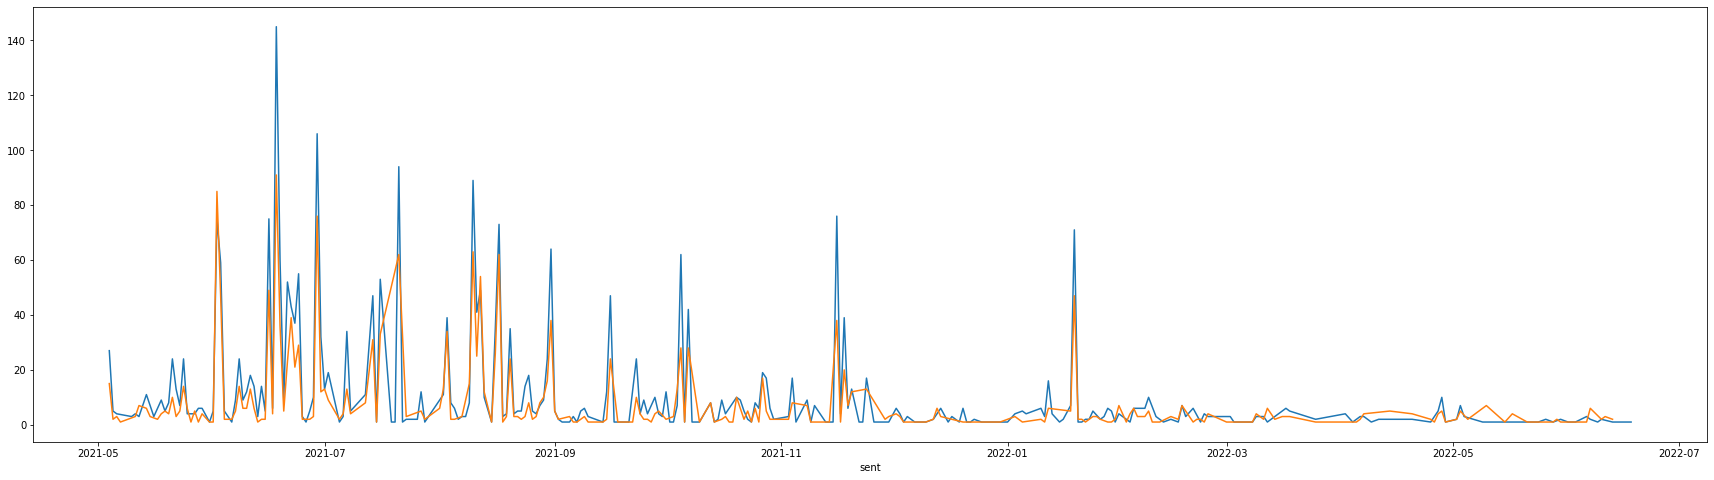

In [274]:
# plot dos positivos
new_df = messages_df[messages_df.sentiment == 'pos'].groupby(['sent'])['sentiment'].count()
new_df.plot(figsize=(30,8))

# plot dos negativos
new_df = messages_df[messages_df.sentiment == 'neg'].groupby(['sent'])['sentiment'].count()
new_df.plot(figsize=(30,8))


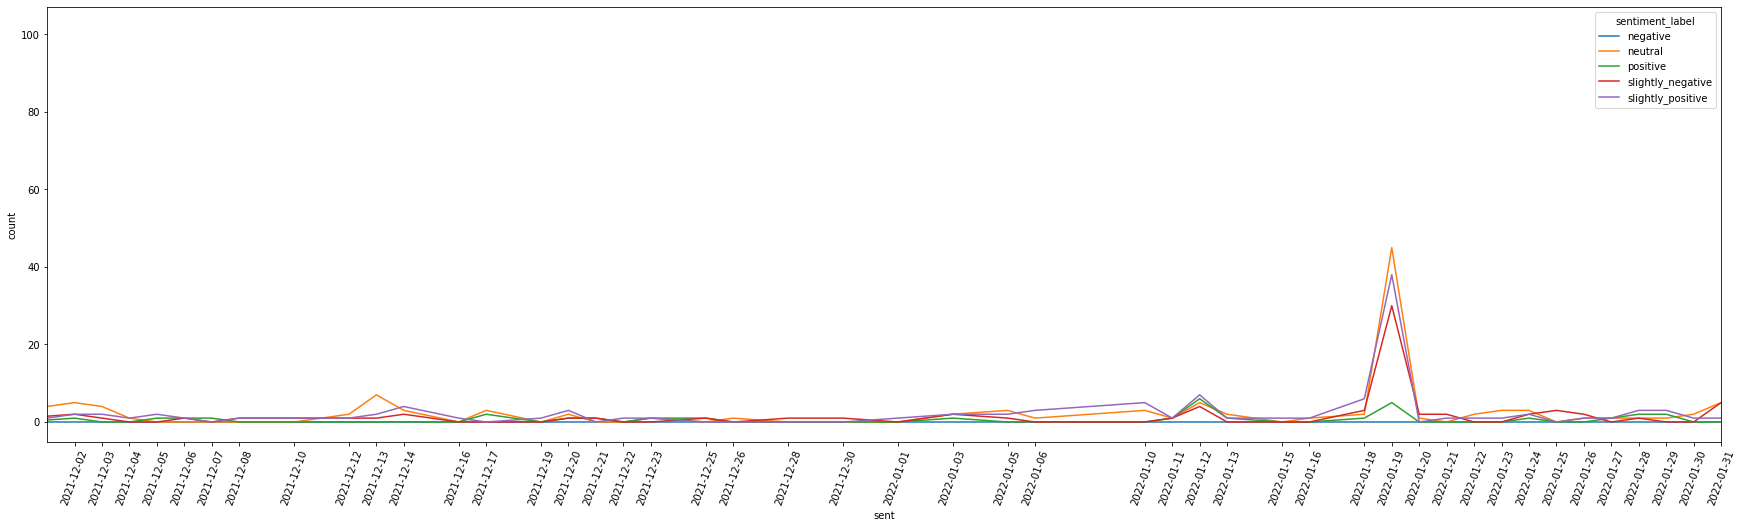

In [12]:
messages_testzada = messages_df.groupby(['sent', 'sentiment_label'])['sentiment_label'].count().reset_index(name="count")

table = pd.pivot_table(messages_testzada, values='count', index=['sent'], columns=['sentiment_label'], fill_value=0)

ax = table.plot(xticks=table.index, ylabel='count',figsize=(30,8), rot=70, xlim=[datetime.date(2021, 12, 1), datetime.date(2022, 1, 31)])

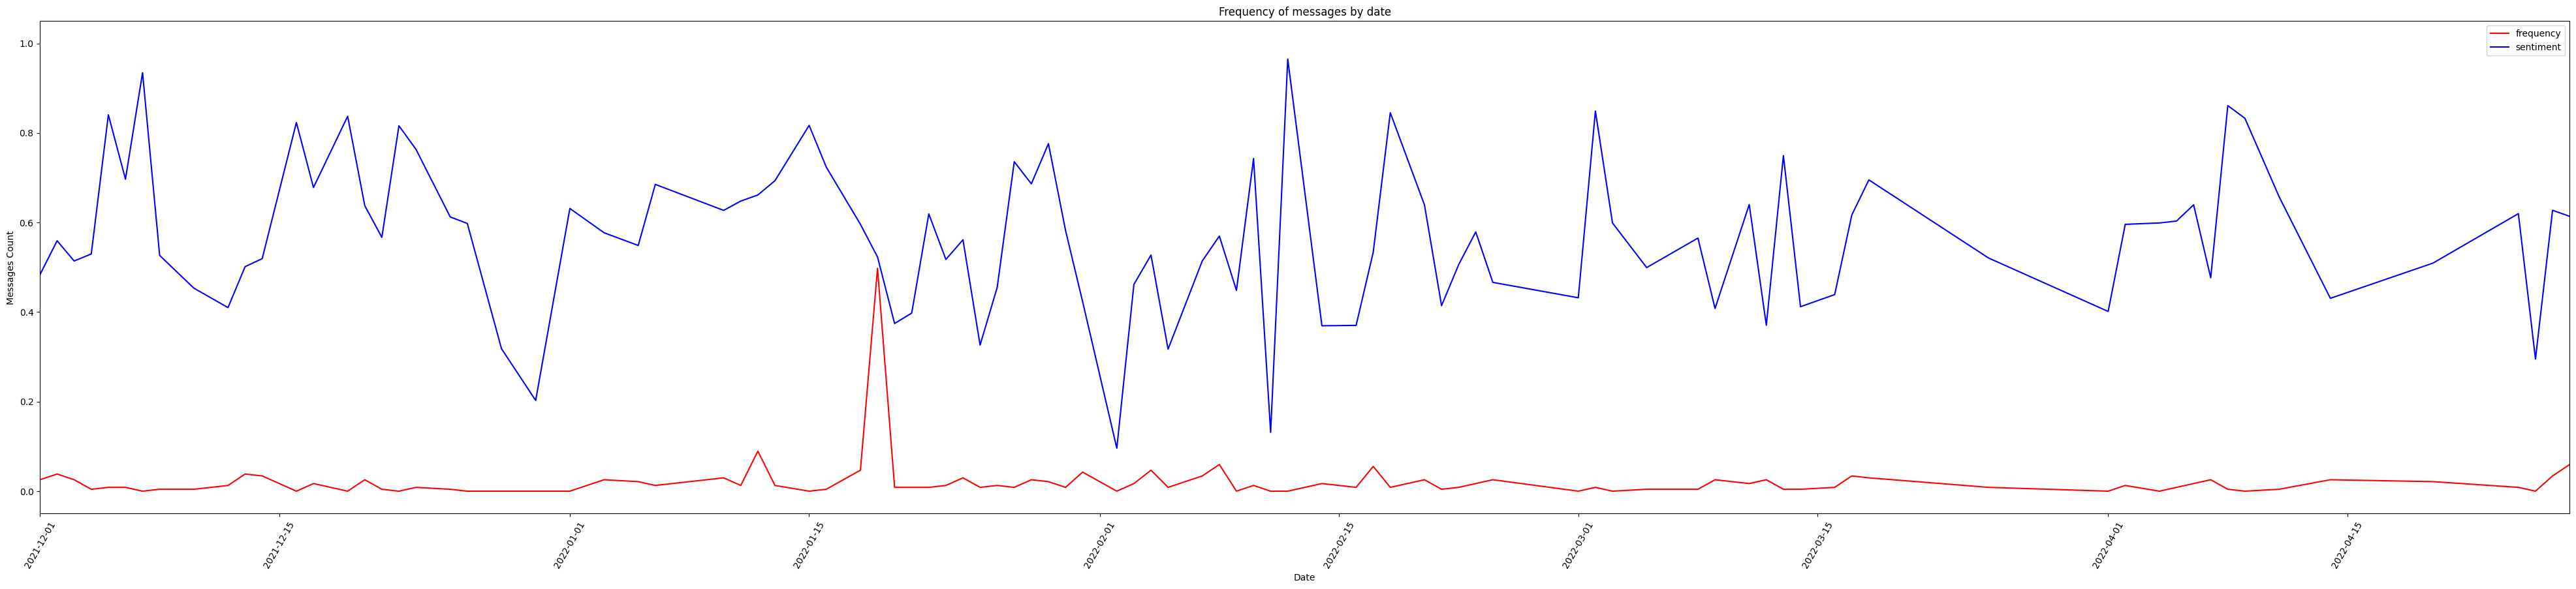

In [9]:
# Fequency

messages_count_df = messages_df.groupby(
    messages_df['sent'])['sentence'].count().to_frame('count').reset_index()

messages_count_df['count'] = (messages_count_df['count']-messages_count_df['count'].min()) / \
    (messages_count_df['count'].max()-messages_count_df['count'].min())

messages_count_df.head()

# Sentiment
messages_sentiment_df = messages_df.groupby(messages_df['sent'])[
    'pos'].mean().to_frame('pos').reset_index()

plt.figure(figsize=(50, 10), dpi=100)


# Plotting both the curves simultaneously
plt.plot(messages_count_df['sent'],
         messages_count_df['count'], color='r', label='frequency')
plt.plot(messages_sentiment_df['sent'],
         messages_sentiment_df['pos'], color='b', label='sentiment')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("Messages Count")
plt.title("Frequency of messages by date")
plt.xticks(rotation=60)

plt.xlim(datetime.date(2021, 12, 1), datetime.date(2022, 4, 28))


# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()
